# Exercise 3

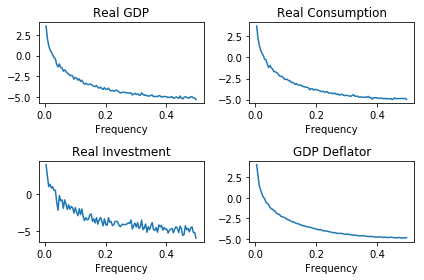

In [13]:
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

rGDP = web.DataReader("GDPC1", "fred", start, end) 
rCON = web.DataReader("PCECC96", "fred", start, end)
rINV = web.DataReader("GPDIC1", "fred", start, end)
GDPdef = web.DataReader("GDPDEF", "fred", start, end)

def spectral(x, name):
    xfreq, xper = sig.periodogram(np.log(x.values), axis=0)
    plt.plot(xfreq[1:], np.log(xper[1:]))
    plt.title(name)
    plt.xlabel('Frequency')

plt.subplot(221)
spectral(rGDP, "Real GDP")
plt.subplot(222)
spectral(rCON, "Real Consumption")
plt.subplot(223)
spectral(rINV, "Real Investment")
plt.subplot(224)
spectral(GDPdef, "GDP Deflator")
plt.tight_layout()
plt.show()

# Exercise 4

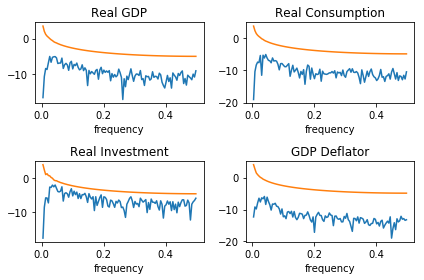

In [20]:
logrGDP = np.log(rGDP.values)
logrCON = np.log(rCON.values)
logrINV = np.log(rINV.values)
logGDPdef = np.log(GDPdef.values)

plt.subplot(221)
IPcy1, IPtr1 = sm.tsa.filters.hpfilter(logrGDP, 1600)
IPfreq11, IPcyper11 = sig.periodogram(IPcy1, axis=0)
IPfreq12, IPtrper12 = sig.periodogram(IPtr1, axis=0)
plt.plot(IPfreq11[1:], np.log(IPcyper11[1:]))
plt.plot(IPfreq12[1:], np.log(IPtrper12[1:]))
plt.title('Real GDP')
plt.xlabel('frequency')

plt.subplot(222)
IPcy2, IPtr2 = sm.tsa.filters.hpfilter(logrCON, 1600)
IPfreq21, IPcyper21 = sig.periodogram(IPcy2, axis=0)
IPfreq22, IPtrper22 = sig.periodogram(IPtr2, axis=0)
plt.plot(IPfreq21[1:], np.log(IPcyper21[1:]))
plt.plot(IPfreq22[1:], np.log(IPtrper22[1:]))
plt.title('Real Consumption')
plt.xlabel('frequency')


plt.subplot(223)
IPcy3, IPtr3 = sm.tsa.filters.hpfilter(logrINV, 1600)
IPfreq31, IPcyper31 = sig.periodogram(IPcy3, axis=0)
IPfreq32, IPtrper32 = sig.periodogram(IPtr3, axis=0)
plt.plot(IPfreq31[1:], np.log(IPcyper31[1:]))
plt.plot(IPfreq32[1:], np.log(IPtrper32[1:]))
plt.title('Real Investment')
plt.xlabel('frequency')


plt.subplot(224)
IPcy4, IPtr4 = sm.tsa.filters.hpfilter(logGDPdef, 1600)
IPfreq41, IPcyper41 = sig.periodogram(IPcy4, axis=0)
IPfreq42, IPtrper42 = sig.periodogram(IPtr4, axis=0)
plt.plot(IPfreq41[1:], np.log(IPcyper41[1:]))
plt.plot(IPfreq42[1:], np.log(IPtrper42[1:]))
plt.title('GDP Deflator')
plt.xlabel('frequency')
plt.tight_layout()
plt.show()

# Exercise 5

logrGDP : std dev 0.00859381844873
logrGDP : autocorrelation 0.687960106218
logrGDP : correlation with GDP 1.0
logrGDP : std dev 0.0114989916571
logrGDP : autocorrelation 0.801978773687
logrGDP : correlation with GDP 1.0
logrGDP : std dev 0.0146643503829
logrGDP : autocorrelation 0.866109113193
logrGDP : correlation with GDP 1.0
logrGDP : std dev 0.017570717855
logrGDP : autocorrelation 0.901510459002
logrGDP : correlation with GDP 1.0
logrGDP : std dev 0.0203368330501
logrGDP : autocorrelation 0.924692145693
logrGDP : correlation with GDP 1.0
logrCON : std dev 0.00658567555868
logrCON : autocorrelation 0.680324514003
logrCON : correlation with GDP 0.782678600607
logrCON : std dev 0.00916280995392
logrCON : autocorrelation 0.810914219231
logrCON : correlation with GDP 0.84288159808
logrCON : std dev 0.0119966758193
logrCON : autocorrelation 0.877190004108
logrCON : correlation with GDP 0.874656067197
logrCON : std dev 0.01508249974
logrCON : autocorrelation 0.916434981404
logrCON : cor

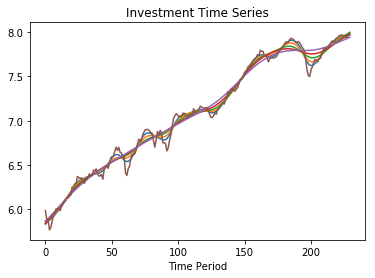

In [71]:
names = ["logrGDP", "logrCON", "logrINV", "logGDPdef"]
measures = [logrGDP, logrCON, logrINV, logGDPdef]
lamb = [100, 400, 1600, 6400, 25600]

def autocorr(x):
    return np.corrcoef(np.array([x[0:len(x)-1], x[1:len(x)]]))[0,1]

gdpvec = np.zeros((1,0))

for i in range(len(lamb)):
    gdpcyper, gdptrper = sm.tsa.filters.hpfilter(logrGDP, lamb[i])
    #gdpfreq, gdpcyper = sig.periodogram(gdpcy, axis=0)
    gdpvec = np.append(gdpvec, gdpcyper)

gdpvec1 = gdpvec[0:229]
gdpvec2 = gdpvec[229:229*2]
gdpvec3 = gdpvec[229*2:229*3]
gdpvec4 = gdpvec[229*3:229*4]
gdpvec5 = gdpvec[229*4:229*5]

gdplist = [gdpvec1, gdpvec2, gdpvec3, gdpvec4, gdpvec5]

for i in range(len(measures)):
    for j in range(len(lamb)):
        IPcyper, IPtrper = sm.tsa.filters.hpfilter(measures[i], lamb[j])
        #IPfreq, IPcyper = sig.periodogram(IPcy, axis=0)
        #IPfreq, IPtrper = sig.periodogram(IPtr, axis=0)

        print(str(names[i]) + " : std dev " + str(np.std(IPcyper)))
        print(str(names[i]) + " : autocorrelation " + str(autocorr(IPcyper)))
        print(str(names[i]) + " : correlation with GDP " + str(np.corrcoef(IPcyper, gdplist[j])[0,1]))

for j in range(len(lamb)):
    IPcyper, IPtrper = sm.tsa.filters.hpfilter(logrINV, lamb[j])
    #IPfreq1, IPcyper = sig.periodogram(IPcy, axis=0)
    #IPfreq2, IPtrper = sig.periodogram(IPtr, axis=0)
    #plt.subplot(str(5) + str(1) + str(j+1))
    #plt.plot(np.linspace(0,229,229), IPcyper)
    plt.plot(np.linspace(0,229,229), IPtrper)
    plt.xlabel("Time Period")
    plt.title("Investment Time Series")

plt.plot(np.linspace(0,229,229), logrINV)
plt.show()